In [1]:
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import os

In [2]:
def load_subj(path, z_index=None):
    files   = sorted(os.listdir(path))
    o, e = [], []
    if z_index is None:
        for i, f in enumerate(files):
            
            n = nib.load(os.path.join(path, f)).get_fdata()
            if i == 0: print(f'Volume shape is {n.shape}')
            zz = n.shape[-1] // 2
            o.append(n[..., zz])
    else:
        for i, f in enumerate(files):
            
            n = nib.load(os.path.join(path, f)).get_fdata()
            if i == 0: print(f'Volume shape is {n.shape}')
            o.append(n[..., z_index])
    o=np.stack(o,axis=-1)
    e=np.copy(o)
    e=e[:, :, np.arange(o.shape[-1]).reshape(o.shape[-1]//2, 2)[:, ::-1].ravel()]
    return o, e
def comp(o, e, axis="x", index=45):
    if axis == "x":
        plt.subplot(1,2,1)
        plt.imshow(o[index, :, :])
        plt.subplot(1,2,2)
        plt.imshow(e[index, :, :])
    else:
        plt.subplot(1,2,1)
        plt.imshow(o[:, index, :])
        plt.subplot(1,2,2)
        plt.imshow(e[:, index, :])    
    plt.show()

In [13]:
path    = "/data/vision/polina/projects/fetal/common-data/clinical-images/all/C007/020"
path    = "/data/vision/polina/projects/fetal/common-data/pose/epis/022318L/"
o, e    = load_subj(path, z_index=None)

Volume shape is (120, 120, 72)


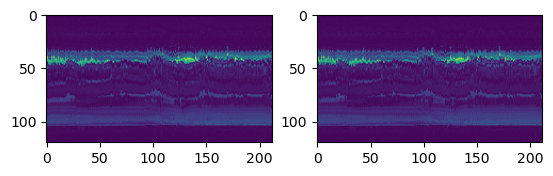

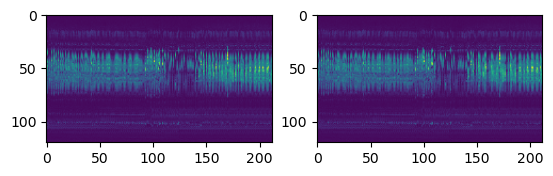

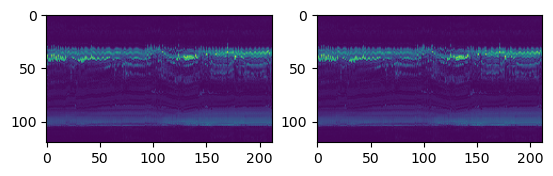

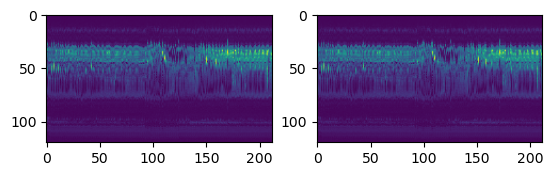

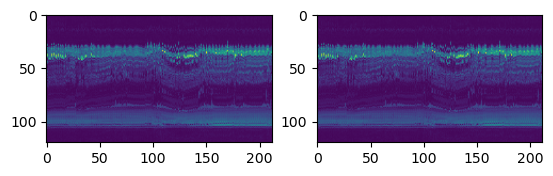

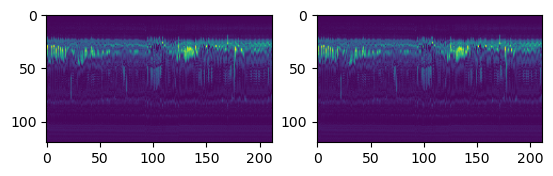

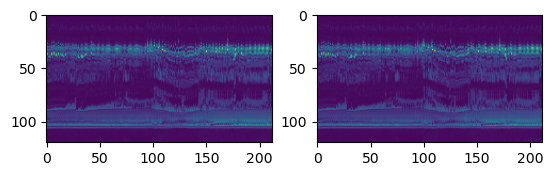

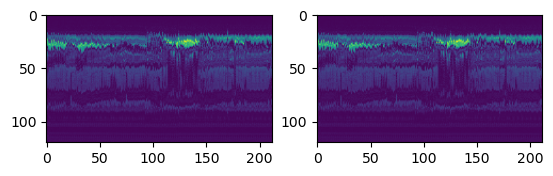

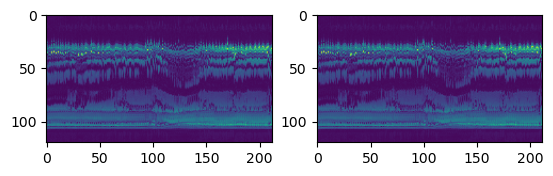

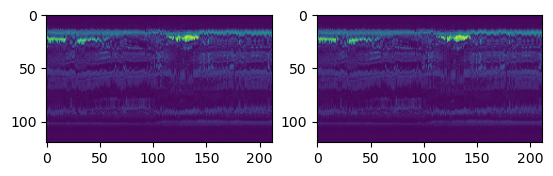

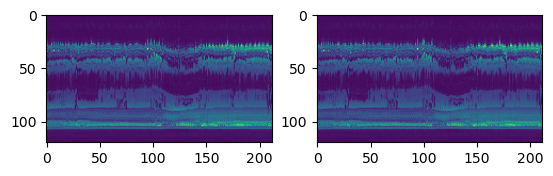

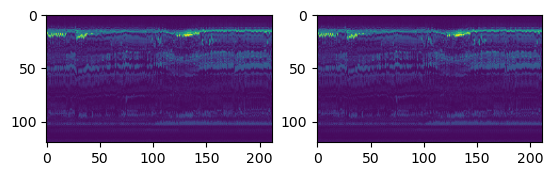

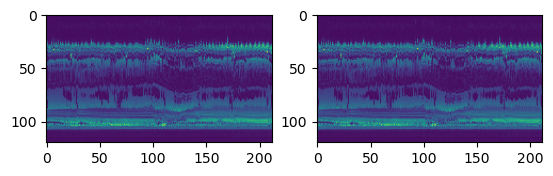

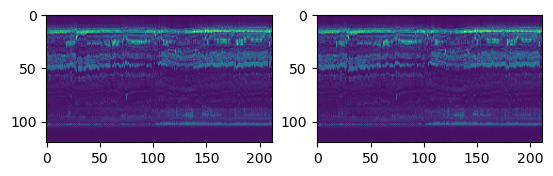

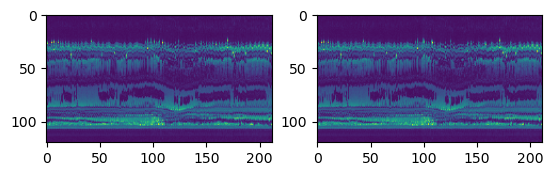

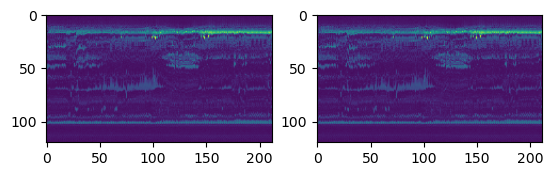

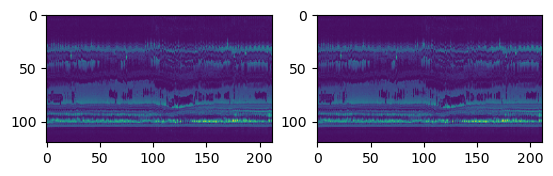

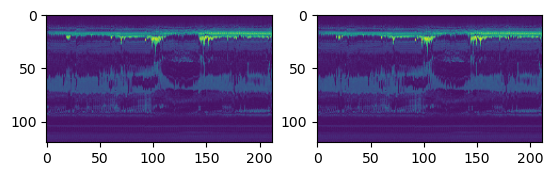

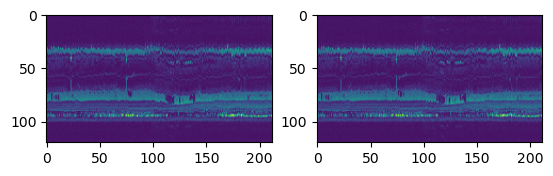

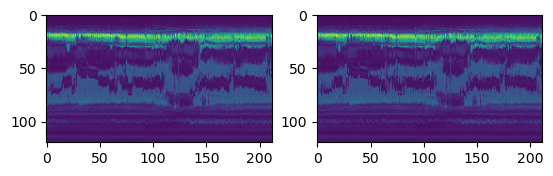

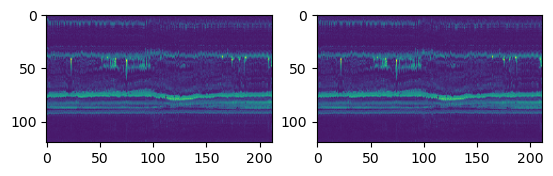

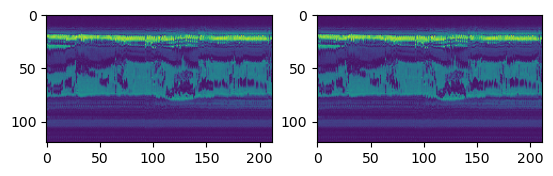

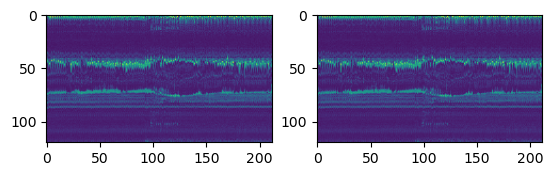

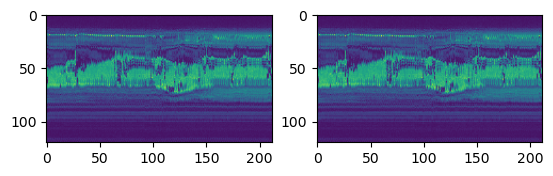

In [14]:
for j in range(30, 90, 5):
    comp(o, e, index=j, axis="y")
    comp(o, e, index=j, axis="x")